In [1]:
import os
import pathlib
from sklearn import preprocessing
from pandas import read_csv
from sklearn.model_selection import train_test_split
import calendar

In [2]:
month = 2   # February
year = 2020
 
num_days = calendar.monthrange(year, month)[1]
 
print("Number of days is",type(num_days)) 

Number of days is <class 'int'>


In [3]:
project_root = pathlib.Path().resolve()
dataDir = 'data'
dataFile = 'data_daily.csv'
path_to_file = os.path.join(project_root, dataDir, dataFile)
data_df = read_csv(path_to_file)

In [4]:
split_factor = 0.1
split_index_test = round(split_factor * len(data_df))

test_df = data_df.iloc[:split_index_test]

split_index_val = 2 * split_index_test
val_df = data_df.iloc[split_index_test:split_index_val]

train_df = data_df.iloc[split_index_val:]

In [5]:
print(test_df.shape)
print(val_df.shape)
print(train_df.shape)

(36, 2)
(36, 2)
(293, 2)


In [6]:
print(test_df)
print(val_df)
print(train_df.head(20))

        # Date  Receipt_Count
0   2021-01-01        7564766
1   2021-01-02        7455524
2   2021-01-03        7095414
3   2021-01-04        7666163
4   2021-01-05        7771289
5   2021-01-06        7473320
6   2021-01-07        7832624
7   2021-01-08        7765028
8   2021-01-09        7385245
9   2021-01-10        7392087
10  2021-01-11        7738899
11  2021-01-12        7840830
12  2021-01-13        8122546
13  2021-01-14        7694195
14  2021-01-15        7200595
15  2021-01-16        7744470
16  2021-01-17        7610648
17  2021-01-18        7880913
18  2021-01-19        7250032
19  2021-01-20        7666397
20  2021-01-21        7742477
21  2021-01-22        7807438
22  2021-01-23        7603625
23  2021-01-24        7572947
24  2021-01-25        7598153
25  2021-01-26        7194687
26  2021-01-27        7787109
27  2021-01-28        7631075
28  2021-01-29        7750536
29  2021-01-30        8059526
30  2021-01-31        7838129
31  2021-02-01        7714465
32  2021-0

In [7]:
import numpy as np

X = np.array([train_df[-10:]["Receipt_Count"]])
print(X)


[[10124238  9464659  9703857 10045897 10738865 10350408 10219445 10313337
  10310644 10211187]]



Number of samples: 293
Max receipt count: 10738865.0
Min receipt count: 7562433.0

Number of samples: 36
Max receipt count: 8352635.0
Min receipt count: 7360372.0

Number of samples: 36
Max receipt count: 8122546.0
Min receipt count: 7095414.0


{'2023-1-1': 10105980.522963865,
 '2023-1-2': 10104386.133214608,
 '2023-1-3': 10101861.743461696,
 '2023-1-4': 10099474.688539166,
 '2023-1-5': 10094250.294608371,
 '2023-1-6': 10091845.161534736,
 '2023-1-7': 10088207.164555404,
 '2023-1-8': 10087183.138327386,
 '2023-1-9': 10085519.038225468,
 '2023-1-10': 10083238.983666737,
 '2023-1-11': 10079580.981181081,
 '2023-1-12': 10077176.314535962,
 '2023-1-13': 10075392.343873069,
 '2023-1-14': 10073499.40989842,
 '2023-1-15': 10071750.66308742,
 '2023-1-16': 10070439.191212907,
 '2023-1-17': 10069587.851300208,
 '2023-1-18': 10068818.159837112,
 '2023-1-19': 10068134.665568687,
 '2023-1-20': 10067531.266169824,
 '2023-1-21': 10067010.721805412,
 '2023-1-22': 10066554.646161,
 '2023-1-23': 10066160.656097643,
 '2023-1-24': 10065812.524484335,
 '2023-1-25': 10065507.10820697,
 '2023-1-26': 10065241.505939363,
 '2023-1-27': 10065016.249538697,
 '2023-1-28': 10064822.580447782,
 '2023-1-29': 10064655.027665362,
 '2023-1-30': 10064511.352940

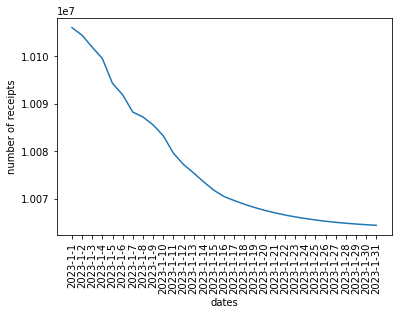

In [8]:
from lstmregr import LSTM
import torch


model_new = LSTM(num_layers=2, hidden_layer_size=16)
model_new.to(dtype=torch.double)
model_new.load_state_dict(torch.load('weights_only_2_16_15.pth'))
model_new.load_data(path_to_file)
    #print("\nTesting on the best model...")
    #print("\nloss for train dataset:")
    #result = evaluate_model(train_dtst, model_new, num_layer)
    #print(f"{result['loss']:>7f}")
    #print("\nloss for validation dataset:")
    #result = model_new.evaluate_model(validation=True)
    #print(f"{result['loss']:>7f}")
    #print("\nloss for test dataset:")
    #result = model_new.evaluate_model()
    #print(f"{result['loss']:>7f}")
    #print("Done!")

model_new.predict_for_month()

In [9]:
from datetime import date
from datetime import timedelta 

# Driver program
date1 = date(2022, 12, 31)
date2 = date(2023, 2, 1)
print(type((date2 - date1).days))
print(type(date1 + timedelta(days=300)))

<class 'int'>
<class 'datetime.date'>


{'2023-1-1': 10105980.522963865,
 '2023-1-2': 10104386.133214608,
 '2023-1-3': 10101861.743461696,
 '2023-1-4': 10099474.688539166,
 '2023-1-5': 10094250.294608371,
 '2023-1-6': 10091845.161534736,
 '2023-1-7': 10088207.164555404,
 '2023-1-8': 10087183.138327386,
 '2023-1-9': 10085519.038225468,
 '2023-1-10': 10083238.983666737,
 '2023-1-11': 10079580.981181081,
 '2023-1-12': 10077176.314535962,
 '2023-1-13': 10075392.343873069,
 '2023-1-14': 10073499.40989842,
 '2023-1-15': 10071750.66308742,
 '2023-1-16': 10070439.191212907,
 '2023-1-17': 10069587.851300208,
 '2023-1-18': 10068818.159837112,
 '2023-1-19': 10068134.665568687,
 '2023-1-20': 10067531.266169824,
 '2023-1-21': 10067010.721805412,
 '2023-1-22': 10066554.646161,
 '2023-1-23': 10066160.656097643,
 '2023-1-24': 10065812.524484335,
 '2023-1-25': 10065507.10820697,
 '2023-1-26': 10065241.505939363,
 '2023-1-27': 10065016.249538697,
 '2023-1-28': 10064822.580447782,
 '2023-1-29': 10064655.027665362,
 '2023-1-30': 10064511.352940

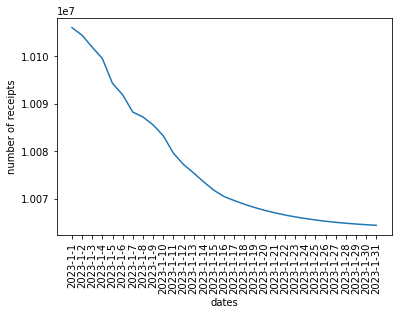

In [10]:
model_new.predict_for_month()

{'2023-6-1': 10063611.855070783,
 '2023-6-2': 10063611.855068749,
 '2023-6-3': 10063611.855066992,
 '2023-6-4': 10063611.855065476,
 '2023-6-5': 10063611.855064169,
 '2023-6-6': 10063611.855063038,
 '2023-6-7': 10063611.855062062,
 '2023-6-8': 10063611.85506122,
 '2023-6-9': 10063611.855060492,
 '2023-6-10': 10063611.855059864,
 '2023-6-11': 10063611.855059322,
 '2023-6-12': 10063611.855058853,
 '2023-6-13': 10063611.855058448,
 '2023-6-14': 10063611.8550581,
 '2023-6-15': 10063611.855057798,
 '2023-6-16': 10063611.855057538,
 '2023-6-17': 10063611.855057314,
 '2023-6-18': 10063611.855057118,
 '2023-6-19': 10063611.855056953,
 '2023-6-20': 10063611.855056807,
 '2023-6-21': 10063611.855056683,
 '2023-6-22': 10063611.855056575,
 '2023-6-23': 10063611.855056481,
 '2023-6-24': 10063611.855056401,
 '2023-6-25': 10063611.855056332,
 '2023-6-26': 10063611.855056271,
 '2023-6-27': 10063611.85505622,
 '2023-6-28': 10063611.855056176,
 '2023-6-29': 10063611.855056137,
 '2023-6-30': 10063611.8550

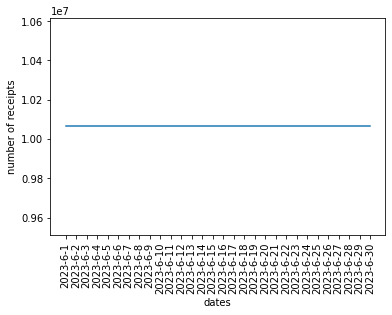

In [11]:
model_new.predict_for_month(month=6, year=2023)

{'2023-6-1': 10063611.855070783,
 '2023-6-2': 10063611.855068749,
 '2023-6-3': 10063611.855066992,
 '2023-6-4': 10063611.855065476,
 '2023-6-5': 10063611.855064169,
 '2023-6-6': 10063611.855063038,
 '2023-6-7': 10063611.855062062,
 '2023-6-8': 10063611.85506122,
 '2023-6-9': 10063611.855060492,
 '2023-6-10': 10063611.855059864,
 '2023-6-11': 10063611.855059322,
 '2023-6-12': 10063611.855058853,
 '2023-6-13': 10063611.855058448,
 '2023-6-14': 10063611.8550581,
 '2023-6-15': 10063611.855057798,
 '2023-6-16': 10063611.855057538,
 '2023-6-17': 10063611.855057314,
 '2023-6-18': 10063611.855057118,
 '2023-6-19': 10063611.855056953,
 '2023-6-20': 10063611.855056807,
 '2023-6-21': 10063611.855056683,
 '2023-6-22': 10063611.855056575,
 '2023-6-23': 10063611.855056481,
 '2023-6-24': 10063611.855056401,
 '2023-6-25': 10063611.855056332,
 '2023-6-26': 10063611.855056271,
 '2023-6-27': 10063611.85505622,
 '2023-6-28': 10063611.855056176,
 '2023-6-29': 10063611.855056137,
 '2023-6-30': 10063611.8550

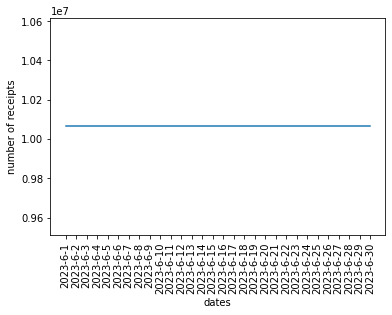

In [12]:
model_new.predict_for_month(month=6, year=2023)


Number of samples: 293
Max receipt count: 10738865.0
Min receipt count: 7562433.0

Number of samples: 36
Max receipt count: 8352635.0
Min receipt count: 7360372.0

Number of samples: 36
Max receipt count: 8122546.0
Min receipt count: 7095414.0


{'2025-6-1': 8785836.228324827,
 '2025-6-2': 8801588.84976203,
 '2025-6-3': 8793923.493462224,
 '2025-6-4': 8780766.633507855,
 '2025-6-5': 8757836.738669055,
 '2025-6-6': 8732320.432620622,
 '2025-6-7': 8701786.146781128,
 '2025-6-8': 8675391.882199315,
 '2025-6-9': 8647418.301691165,
 '2025-6-10': 8616523.127357878,
 '2025-6-11': 8587183.642380409,
 '2025-6-12': 8557977.89842892,
 '2025-6-13': 8527257.605150599,
 '2025-6-14': 8494419.255995763,
 '2025-6-15': 8465899.80266363,
 '2025-6-16': 8437587.595736636,
 '2025-6-17': 8414702.131350243,
 '2025-6-18': 8393503.58994214,
 '2025-6-19': 8374432.327987795,
 '2025-6-20': 8357543.095789773,
 '2025-6-21': 8342806.257118655,
 '2025-6-22': 8330067.28488928,
 '2025-6-23': 8319157.145952154,
 '2025-6-24': 8309841.793333519,
 '2025-6-25': 8301933.440097843,
 '2025-6-26': 8295259.494359996,
 '2025-6-27': 8289639.918332768,
 '2025-6-28': 8284922.953378879,
 '2025-6-29': 8280982.075680781,
 '2025-6-30': 8277708.7242606}

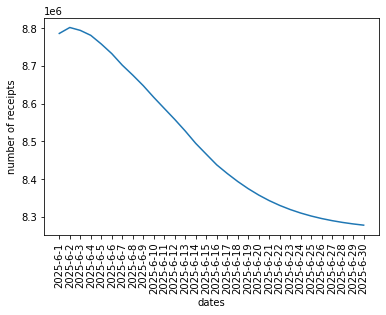

In [13]:
model_new = LSTM(num_layers=2, hidden_layer_size=16)
model_new.to(dtype=torch.double)
model_new.load_state_dict(torch.load('weights_only_2_16_15.pth'))
model_new.load_data(path_to_file)
model_new.predict_for_month_with_prev([8544557, 8735065, 8326629, 8831147, 8857992, 9160117, 8672036, 8670423, 8869283, 
                                       8686309, 8654144, 8860853, 9198488, 8960260, 9122667], month=6, year=2025)